# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1722201635660.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,07/26/2024,5459.10,5433.67,5488.32,5430.70
1,07/25/2024,5399.22,5428.70,5491.59,5390.95
2,07/24/2024,5427.13,5505.84,5508.04,5419.98
3,07/23/2024,5555.74,5565.30,5585.34,5550.90
4,07/22/2024,5564.41,5544.54,5570.36,5529.04
...,...,...,...,...,...
2524,08/01/2014,1925.15,1929.80,1937.35,1916.37
2525,07/31/2014,1930.67,1965.14,1965.14,1930.67
2526,07/30/2014,1970.07,1973.21,1978.90,1962.42
2527,07/29/2014,1969.95,1980.03,1984.85,1969.95


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2529.000000,2529.000000,2529.000000,2529.000000
mean,3187.334516,3177.045484,3194.025544,3158.859703
std,989.215253,1009.903175,1015.528890,1004.354555
min,1829.080000,0.000000,0.000000,0.000000
25%,2270.440000,2269.720000,2275.320000,2263.350000
50%,2896.720000,2900.860000,2909.600000,2884.690000
75%,4105.020000,4096.110000,4130.350000,4073.850000
max,5667.200000,5644.090000,5669.670000,5639.020000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,3192.727342,3192.192304,3209.253317,3173.919821
std,988.468446,988.128561,993.644038,982.710827
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2278.870000,2274.020000,2283.970000,2268.040000
50%,2901.520000,2906.380000,2912.360000,2891.730000
75%,4109.110000,4098.450000,4132.800000,4075.290000
max,5667.200000,5644.090000,5669.670000,5639.020000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2528
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Open        2517 non-null   float64
 3   High        2517 non-null   float64
 4   Low         2517 non-null   float64
dtypes: float64(4), object(1)
memory usage: 118.0+ KB


In [5]:
df.shape

(2517, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

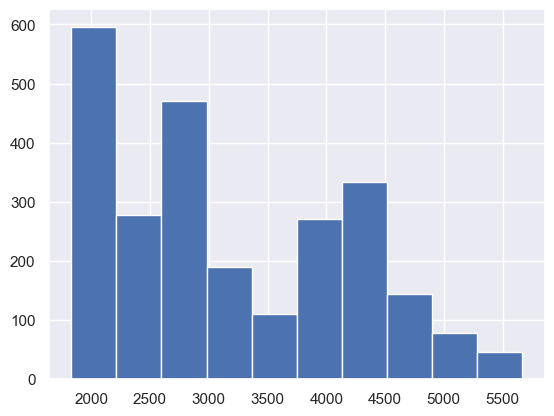

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5459.1

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3192.727342073902

In [10]:
close_sd = df['Close/Last'].std()
close_sd

988.4684463522301

In [11]:
sigma1 = close_mean + close_sd
sigma1

4181.195788426132

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5169.664234778362

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5663.898457954478

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2528
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-07-28 to 2024-07-26')

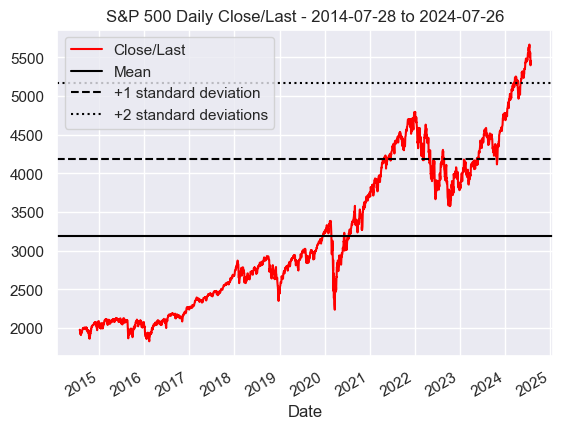

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-07-28 to 2024-07-26')

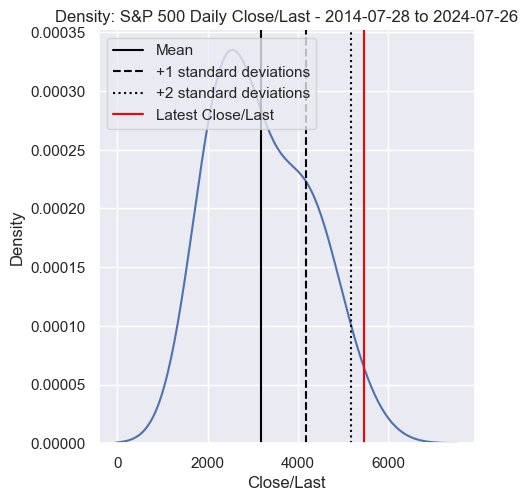

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.2928123465040793

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results